In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



## Load Data 

In [2]:
df=pd.read_csv("E:\Slash InternShip\Amazon Sale Report.csv")
df.set_index('index',inplace=True)


C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\2771203888.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("E:\Slash InternShip\Amazon Sale Report.csv")


In [3]:
df.head()

Order ID      Date                        Status Fulfilment  \
index                                                                           
0      405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1      171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
2      404-0687676-7273146  04-30-22                       Shipped     Amazon   
3      403-9615377-8133951  04-30-22                     Cancelled   Merchant   
4      407-1069790-7240320  04-30-22                       Shipped     Amazon   

      Sales Channel  ship-service-level    Style              SKU  \
index                                                               
0          Amazon.in           Standard   SET389   SET389-KR-NP-S   
1          Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2          Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3          Amazon.in           Standard    J0341       J0341-DR-L   
4          Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

            Category Size  ... currency  Amount    ship-city   ship-state  \
index                      ...                                              
0                Set    S  ...      INR  647.62       MUMBAI  MAHARASHTRA   
1              kurta  3XL  ...      INR  406.00    BENGALURU    KARNATAKA   
2              kurta   XL  ...      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3      Western Dress    L  ...      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4                Top  3XL  ...      INR  574.00      CHENNAI   TAMIL NADU   

       ship-postal-code ship-country  \
index                                  
0              400081.0           IN   
1              560085.0           IN   
2              410210.0           IN   
3              605008.0           IN   
4              600073.0           IN   

                                           promotion-ids    B2B fulfilled-by  \
index                                                                          
0                                                    NaN  False    Easy Ship   
1      Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship   
2           IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN   
3                                                    NaN  False    Easy Ship   
4                                                    NaN  False          NaN   

      Unnamed: 22  
index              
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 23 columns]

In [4]:
df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

##  Exploratory Data Analysis (EDA)

In [5]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-null  ob

In [7]:
num_duplicated_rows = df.duplicated().sum()
print("Count of Duplicated rows is :",num_duplicated_rows)

Count of Duplicated rows is : 6


In [8]:
df.describe()

Qty         Amount  ship-postal-code
count  128975.000000  121180.000000     128942.000000
mean        0.904431     648.561465     463966.236509
std         0.313354     281.211687     191476.764941
min         0.000000       0.000000     110001.000000
25%         1.000000     449.000000     382421.000000
50%         1.000000     605.000000     500033.000000
75%         1.000000     788.000000     600024.000000
max        15.000000    5584.000000     989898.000000

In [9]:
df.describe(include='O')

Order ID      Date   Status Fulfilment Sales Channel   \
count                128975    128975   128975     128975         128975   
unique               120378        91       13          2              2   
top     171-5057375-2831560  05-03-22  Shipped     Amazon      Amazon.in   
freq                     12      2085    77804      89698         128851   

       ship-service-level    Style           SKU Category    Size        ASIN  \
count              128975   128975        128975   128975  128975      128975   
unique                  2     1377          7195        9      11        7190   
top             Expedited  JNE3797  JNE3797-KR-L      Set       M  B09SDXFFQ1   
freq                88615     4224           773    50284   22711         773   

       Courier Status currency  ship-city   ship-state ship-country  \
count          122103   121180     128942       128942       128942   
unique              3        1       8955           69            1   
top           Shipped      INR  BENGALURU  MAHARASHTRA           IN   
freq           109487   121180      11217        22260       128942   

                                       promotion-ids fulfilled-by Unnamed: 22  
count                                          79822        39277       79925  
unique                                          5787            1           1  
top     IN Core Free Shipping 2015/04/08 23-48-5-108    Easy Ship       False  
freq                                           46100        39277       79925

In [10]:
top_30_dates=df['Date'].value_counts().nlargest(30)
top_30_dates


Date
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
04-20-22    1850
04-23-22    1816
04-24-22    1810
05-01-22    1809
04-16-22    1759
04-10-22    1754
04-21-22    1746
04-03-22    1691
04-08-22    1678
04-19-22    1678
04-30-22    1669
04-25-22    1665
04-22-22    1657
04-13-22    1651
04-09-22    1619
04-05-22    1617
04-17-22    1604
06-08-22    1590
06-05-22    1586
06-12-22    1575
04-18-22    1568
06-09-22    1568
04-26-22    1563
04-11-22    1562
04-06-22    1557
Name: count, dtype: int64

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\417707764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_dates.index, y=top_30_dates.values, palette='viridis')


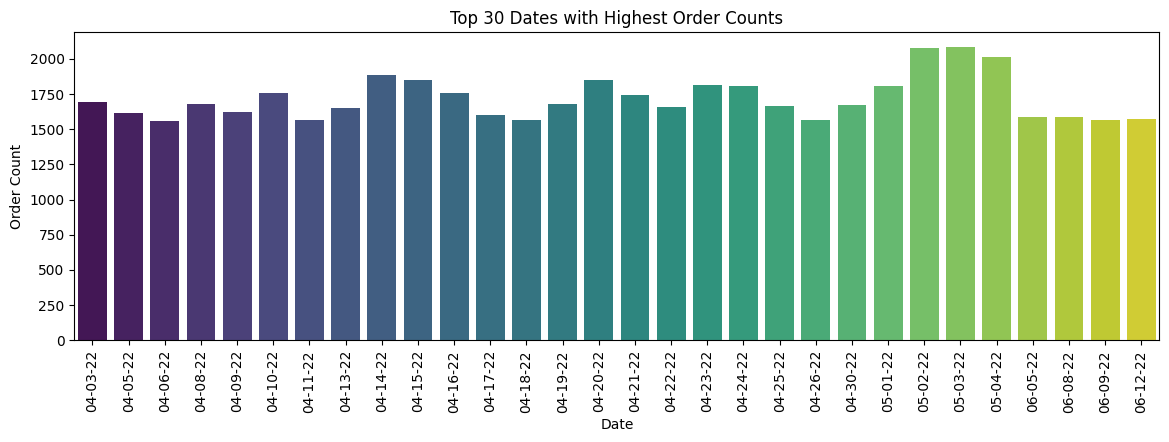

In [11]:
top_30_dates = top_30_dates.sort_index()
plt.figure(figsize=(14, 4))
sns.barplot(x=top_30_dates.index, y=top_30_dates.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 30 Dates with Highest Order Counts')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.show()


In [12]:
df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

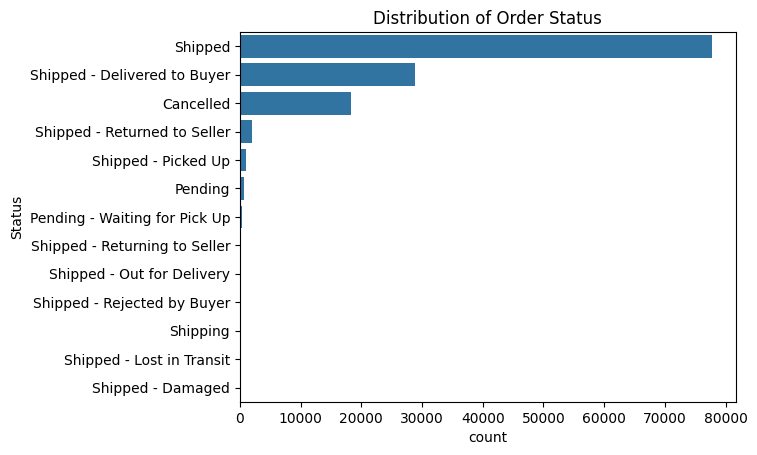

In [13]:
sns.countplot(y='Status', data=df, order=df['Status'].value_counts().index)
plt.title('Distribution of Order Status')
plt.show()

In [14]:
df['Fulfilment'].value_counts() 


Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\1942923880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fulfilment', y='Count', data=fulfilment_df, palette='pastel')


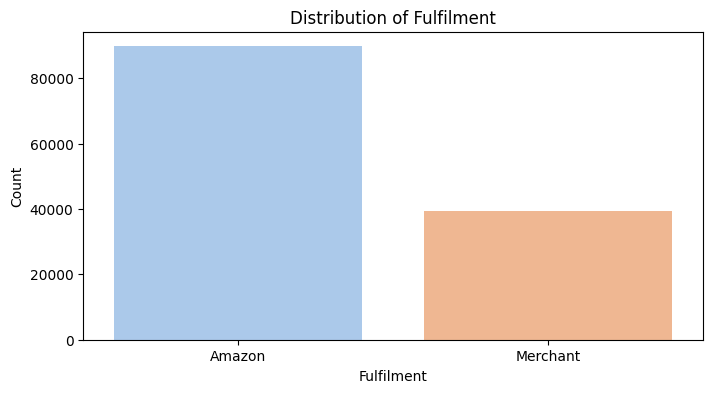

In [15]:
fulfilment_counts = df['Fulfilment'].value_counts()
fulfilment_df = fulfilment_counts.reset_index()
fulfilment_df.columns = ['Fulfilment', 'Count']
plt.figure(figsize=(8, 4))
sns.barplot(x='Fulfilment', y='Count', data=fulfilment_df, palette='pastel')
plt.title('Distribution of Fulfilment')
plt.xlabel('Fulfilment')
plt.ylabel('Count')
plt.show()

In [16]:
df['Category'].value_counts()

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

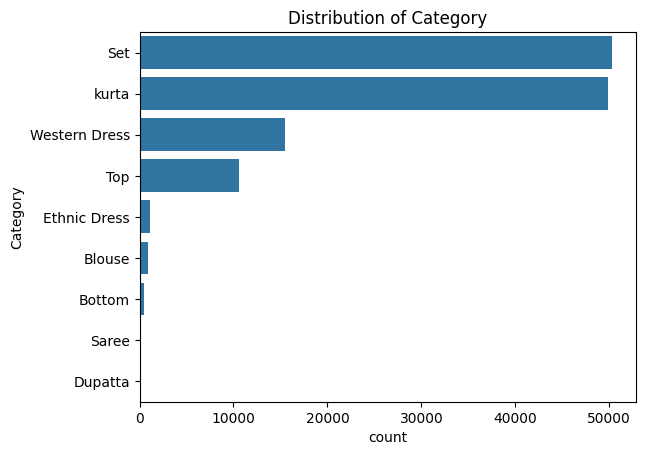

In [17]:
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Category')
plt.show()

In [18]:
df['Style'].value_counts().nlargest(10)

Style
JNE3797    4224
JNE3405    2263
J0230      1868
SET268     1860
J0341      1630
J0003      1627
SET324     1284
SET345     1250
JNE3373    1173
JNE3440    1054
Name: count, dtype: int64

In [19]:
df['ship-state'].value_counts()

ship-state
MAHARASHTRA               22260
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: count, Length: 69, dtype: int64

In [20]:
px.histogram(df,x='ship-state')

In [21]:
df['SKU'].value_counts()

SKU
JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
                  ... 
BTM004-XXXL          1
BL090-XS             1
BTM045-PP-M          1
SET034-KR-NP-XS      1
SET045-KR-NP-M       1
Name: count, Length: 7195, dtype: int64

## Step 2: Data Preprocessing


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-null  ob

### 1. Handling Missing Values:


In [23]:
df.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

<Axes: ylabel='index'>

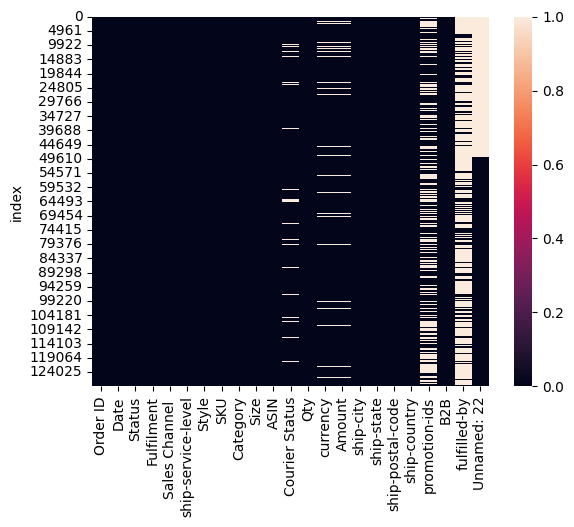

In [24]:
sns.heatmap(df.isnull()) 

In [25]:
df.dropna(subset=['ship-city','ship-state','ship-postal-code','ship-country'],inplace=True)


In [26]:
df = df.dropna(subset=['Amount'])
df['currency'].fillna('INR',inplace=True)
df['promotion-ids'].fillna('No Promotion',inplace=True)
df['Courier Status'].fillna('Unknow',inplace=True)

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\4167099136.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\4167099136.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [27]:
df.drop(columns=['fulfilled-by','Unnamed: 22'], inplace=True)

In [28]:
df.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
dtype: int64

### 2. Data Type Conversion:


In [29]:
df['Date'].value_counts()

Date
05-02-22    1932
05-03-22    1921
05-04-22    1865
04-14-22    1771
04-20-22    1752
            ... 
06-23-22    1009
06-24-22     965
06-25-22     964
06-29-22     629
03-31-22     162
Name: count, Length: 91, dtype: int64

In [30]:
from babel.dates import format_date
df['Date']=pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day_Name'] = df['Date'].apply(lambda x: format_date(x, 'EEEE', locale='en'))


C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\705106884.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [31]:
df['Year'].value_counts() # Year is not useful 

Year
2022    121149
Name: count, dtype: int64

In [32]:
df.drop(columns=['Year'],inplace=True)

**Certainly! In India, the seasons are typically categorized as follows**

- Winter: January - February
- Spring: March - April
- Summer: May - June
- Monsoon (Rainy Season): July - September
- Autumn: October - November
Pre-Winter: December

In [33]:
def get_season(month):
    if month in [1, 2]:
        return 'Winter'
    elif month in [3, 4]:
        return 'Spring'
    elif month in [5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Autumn'
    elif month == 12:
        return 'Pre-Winter'
    else:
        return 'Invalid Month'

df['Season'] = df['Month'].apply(get_season)


In [34]:
df['Season'].value_counts()

Season
Summer    74932
Spring    46217
Name: count, dtype: int64

- the columns aren't Useful [ Date  , Day_Name , Season]

In [35]:
df.drop(columns=['Date','Day_Name','Season'],inplace=True)

### 3. Outlier Detection and Treatment:

In [36]:
df['Amount'].value_counts()

Amount
399.00    5441
771.00    2797
735.00    2435
0.00      2343
487.00    2292
          ... 
558.10       1
551.42       1
973.00       1
727.60       1
639.00       1
Name: count, Length: 1410, dtype: int64

In [37]:
df.describe()

Qty         Amount  ship-postal-code            Day  \
count  121149.000000  121149.000000     121149.000000  121149.000000   
mean        0.961246     648.573305     463652.687525      14.933115   
std         0.214327     281.222115     191316.128616       8.738914   
min         0.000000       0.000000     110001.000000       1.000000   
25%         1.000000     449.000000     382421.000000       7.000000   
50%         1.000000     605.000000     500032.000000      15.000000   
75%         1.000000     788.000000     600021.000000      22.000000   
max         8.000000    5584.000000     989898.000000      31.000000   

               Month  
count  121149.000000  
mean        4.909434  
std         0.818269  
min         3.000000  
25%         4.000000  
50%         5.000000  
75%         6.000000  
max         6.000000

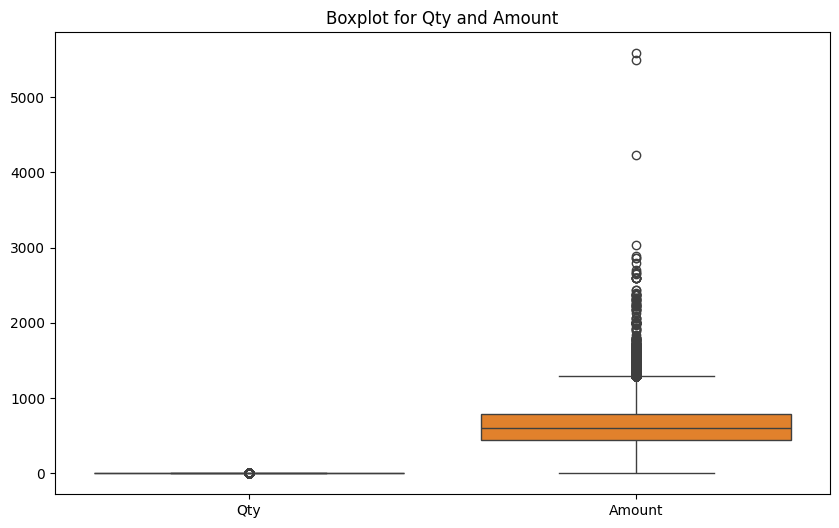

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Qty', 'Amount']])
plt.title('Boxplot for Qty and Amount')
plt.show()

In [39]:
df[df['Amount']==5584.0][['Style','Qty']]

Style  Qty
index             
42039  SET268    8

**From Analysis shows that the values in the numerical columns (like Qty and Amount) are normal and do not contain any outliers, then there is no need to take any actions to treat outliers**

### Preproceccing to The Column Status

In [40]:
df['Status'].value_counts()

Status
Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                        10761
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [41]:
def processing_status(title):
    if 'Shipped - Returning to Seller' in title:
        return title.replace('Shipped - Returning to Seller','Shipped - Returned to Seller')
    elif 'Shipped - Rejected by Buyer' in title:
        return title.replace('Shipped - Rejected by Buyer','Shipped - Returned to Seller')
    elif 'Shipped - Picked Up' in title:
        return title.replace('Shipped - Picked Up','Shipped - Delivered to Buyer')
    else:
        return title
    
df['Status']=df['Status'].apply(processing_status)

In [42]:
df['Status'].value_counts()

Status
Shipped                          77580
Shipped - Delivered to Buyer     29727
Cancelled                        10761
Shipped - Returned to Seller      2103
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Out for Delivery          35
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

## Step 3: Data Visualization


In [43]:
df.head()

Order ID                        Status Fulfilment  \
index                                                                 
0      405-8078784-5731545                     Cancelled   Merchant   
1      171-9198151-1101146  Shipped - Delivered to Buyer   Merchant   
2      404-0687676-7273146                       Shipped     Amazon   
3      403-9615377-8133951                     Cancelled   Merchant   
4      407-1069790-7240320                       Shipped     Amazon   

      Sales Channel  ship-service-level    Style              SKU  \
index                                                               
0          Amazon.in           Standard   SET389   SET389-KR-NP-S   
1          Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2          Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3          Amazon.in           Standard    J0341       J0341-DR-L   
4          Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

            Category Size        ASIN  ... currency  Amount    ship-city  \
index                                  ...                                 
0                Set    S  B09KXVBD7Z  ...      INR  647.62       MUMBAI   
1              kurta  3XL  B09K3WFS32  ...      INR  406.00    BENGALURU   
2              kurta   XL  B07WV4JV4D  ...      INR  329.00  NAVI MUMBAI   
3      Western Dress    L  B099NRCT7B  ...      INR  753.33   PUDUCHERRY   
4                Top  3XL  B098714BZP  ...      INR  574.00      CHENNAI   

        ship-state ship-postal-code ship-country  \
index                                              
0      MAHARASHTRA         400081.0           IN   
1        KARNATAKA         560085.0           IN   
2      MAHARASHTRA         410210.0           IN   
3       PUDUCHERRY         605008.0           IN   
4       TAMIL NADU         600073.0           IN   

                                           promotion-ids    B2B Day  Month  
index                                                                       
0                                           No Promotion  False  30      4  
1      Amazon PLCC Free-Financing Universal Merchant ...  False  30      4  
2           IN Core Free Shipping 2015/04/08 23-48-5-108   True  30      4  
3                                           No Promotion  False  30      4  
4                                           No Promotion  False  30      4  

[5 rows x 22 columns]

In [44]:
df.groupby('Month')['Amount'].max() 


Month
3    1799.0
4    5584.0
5    3036.0
6    2894.0
Name: Amount, dtype: float64

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\1722328880.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




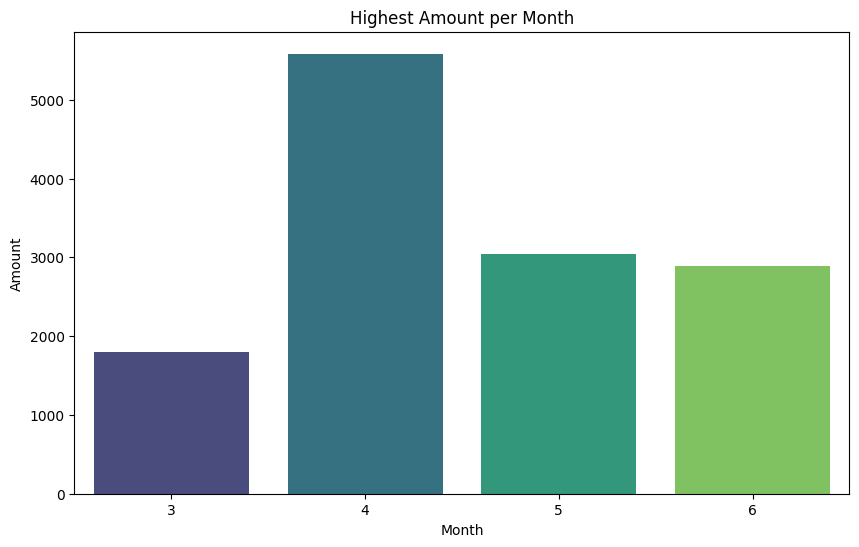

In [45]:
max_amounts = df.groupby('Month')['Amount'].max().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=max_amounts, x='Month', y='Amount', palette='viridis')
plt.title('Highest Amount per Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

In [46]:
df.groupby('Month')['Qty'].max()

Month
3    1
4    8
5    4
6    5
Name: Qty, dtype: int64

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\4182592750.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




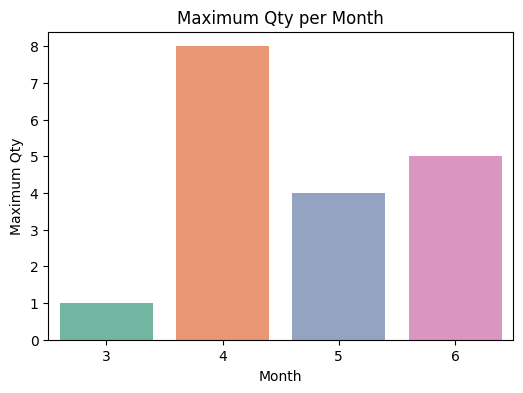

In [47]:
max_qty_per_month = df.groupby('Month')['Qty'].max().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=max_qty_per_month, x='Month', y='Qty', palette='Set2')
plt.title('Maximum Qty per Month')
plt.xlabel('Month')
plt.ylabel('Maximum Qty')
plt.show()

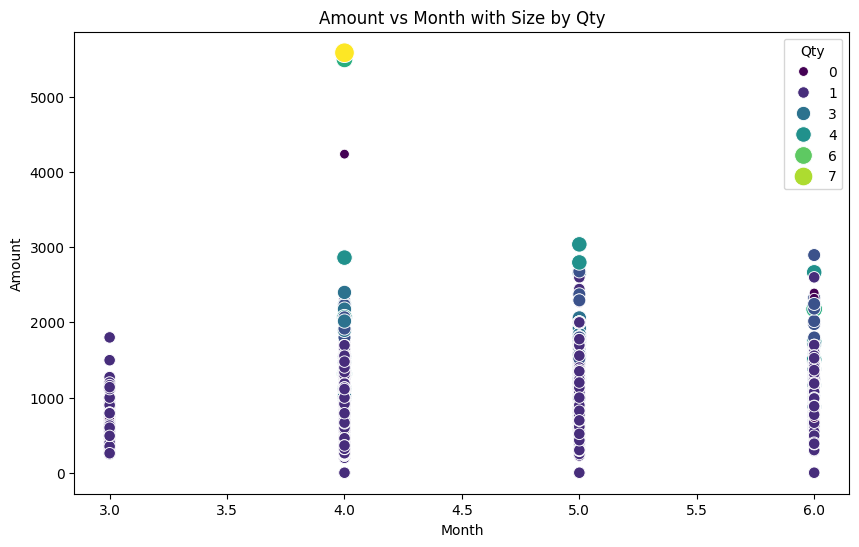

In [48]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(data=df, x='Month', y='Amount', size='Qty', sizes=(50, 200),hue='Qty', palette=colors)
plt.title('Amount vs Month with Size by Qty')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

In [49]:
df['Style'].value_counts().nlargest(10)

Style
JNE3797    3994
JNE3405    2102
SET268     1732
J0230      1732
J0341      1538
J0003      1489
SET324     1205
SET345     1152
JNE3373    1078
JNE3440     993
Name: count, dtype: int64

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\2939760234.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




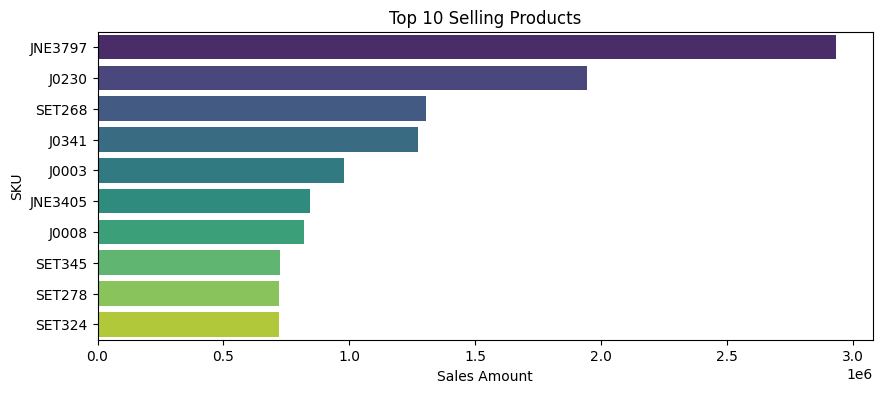

In [50]:
# top-selling products
top_products = df.groupby('Style')['Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='Amount', y='Style', data=top_products, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Sales Amount')
plt.ylabel('SKU')
plt.show()

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\1135778373.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




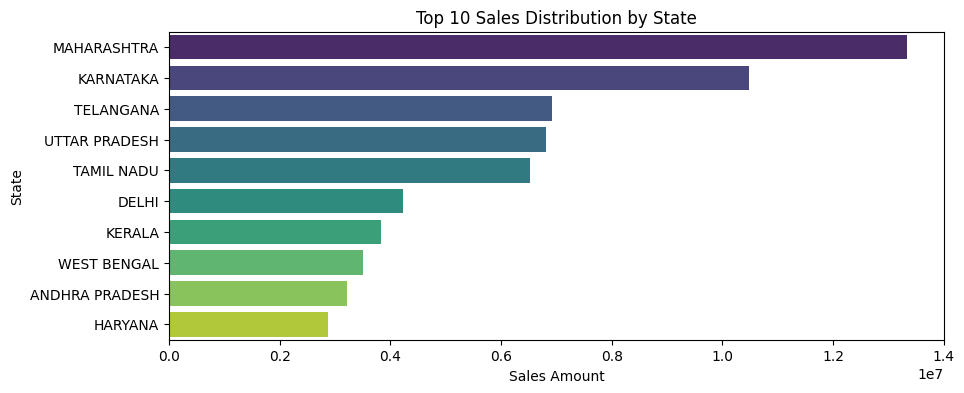

In [51]:
state_sales = df.groupby('ship-state')['Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='Amount', y='ship-state', data=state_sales, palette='viridis')
plt.title('Top 10 Sales Distribution by State')
plt.xlabel('Sales Amount')
plt.ylabel('State')
plt.show()

In [52]:
#Number of status for each month
df.groupby(['Month', 'Status']).size().reset_index(name='Count')

Month                         Status  Count
0       3                      Cancelled     10
1       3                        Shipped    135
2       3   Shipped - Delivered to Buyer     16
3       3   Shipped - Returned to Seller      1
4       4                      Cancelled   4225
5       4                        Pending      1
6       4                        Shipped  28849
7       4   Shipped - Delivered to Buyer  12077
8       4      Shipped - Lost in Transit      2
9       4     Shipped - Out for Delivery      1
10      4   Shipped - Returned to Seller    900
11      5                      Cancelled   3442
12      5                        Pending      7
13      5                        Shipped  24955
14      5   Shipped - Delivered to Buyer  10401
15      5      Shipped - Lost in Transit      3
16      5     Shipped - Out for Delivery      1
17      5   Shipped - Returned to Seller    716
18      6                      Cancelled   3084
19      6                        Pending    648
20      6  Pending - Waiting for Pick Up    281
21      6                        Shipped  23641
22      6              Shipped - Damaged      1
23      6   Shipped - Delivered to Buyer   7233
24      6     Shipped - Out for Delivery     33
25      6   Shipped - Returned to Seller    486

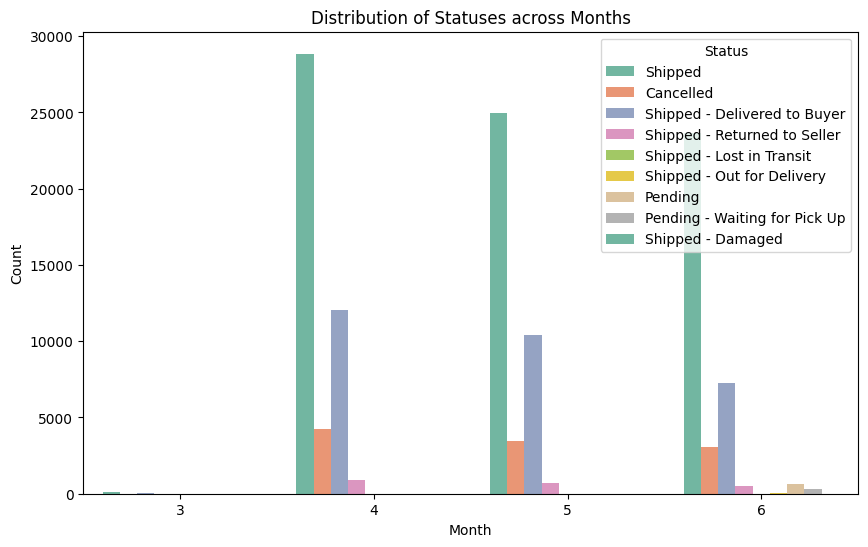

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Status', palette='Set2')
plt.title('Distribution of Statuses across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

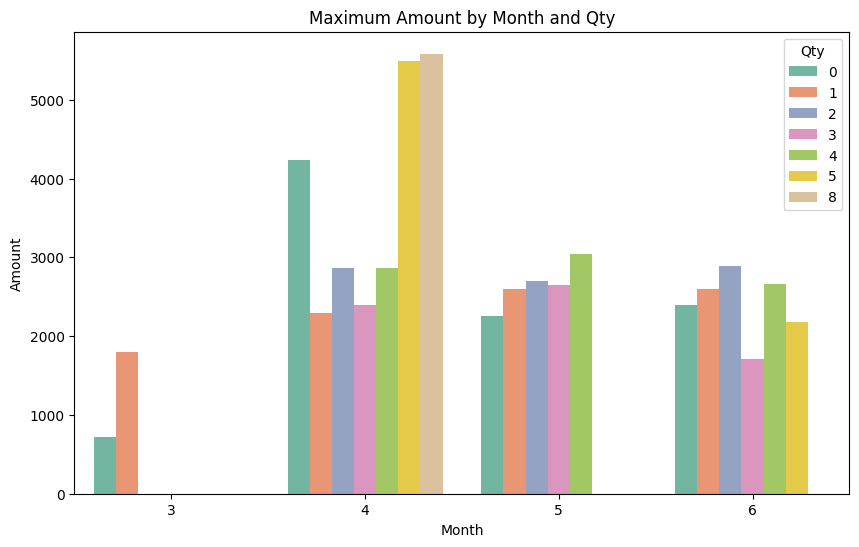

In [54]:
max_amounts = df.groupby(['Month', 'Qty'])['Amount'].max().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=max_amounts, x='Month', y='Amount', hue='Qty', palette='Set2')
plt.title('Maximum Amount by Month and Qty')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\1128511663.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




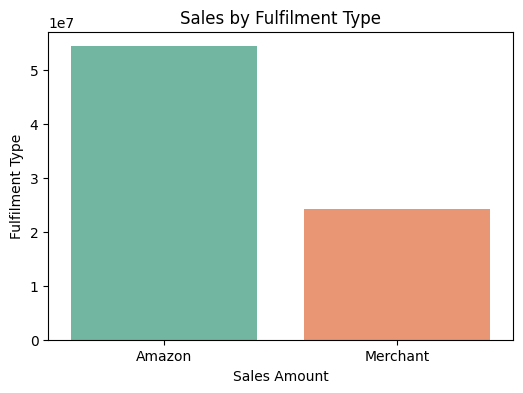

In [55]:
fulfilment_sales = df.groupby('Fulfilment')['Amount'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(y='Amount', x='Fulfilment', data=fulfilment_sales, palette='Set2')
plt.title('Sales by Fulfilment Type')
plt.xlabel('Sales Amount')
plt.ylabel('Fulfilment Type')
plt.show()

C:\Users\Omar Shoieb\AppData\Local\Temp\ipykernel_5416\2876663873.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




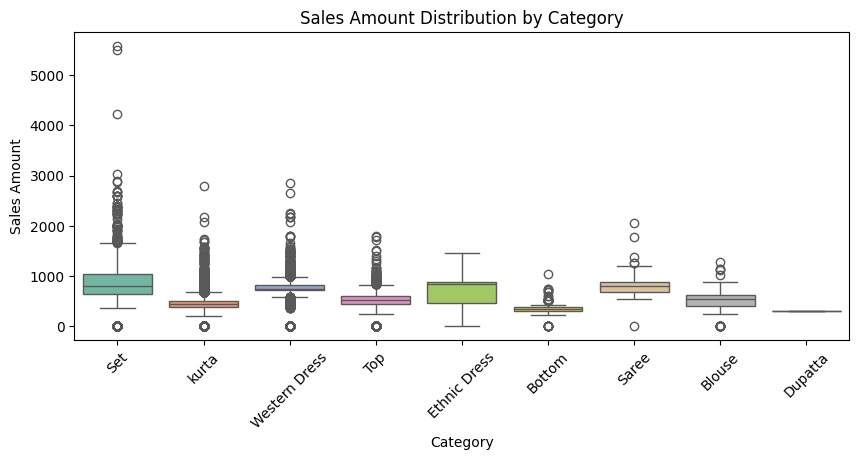

In [56]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Category', y='Amount', data=df, palette='Set2')
plt.title('Sales Amount Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


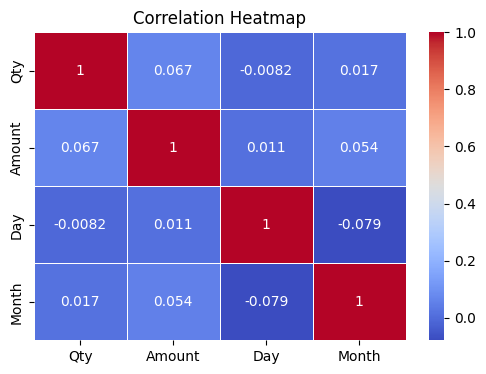

In [57]:
corr = df[['Qty', 'Amount', 'Day', 'Month']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Predictive Modeling

## Data Preparation


In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = ['Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids', 'B2B', 'currency']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Order ID', 'Status'])
y = df['Status']

le_status = LabelEncoder()
y = le_status.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9812216260833677
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2190
           1       0.97      0.87      0.92       125
           2       0.89      0.97      0.93        67
           3       1.00      1.00      1.00     15452
           5       0.93      1.00      0.96      5960
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         9
           8       0.50      0.01      0.02       425

    accuracy                           0.98     24230
   macro avg       0.66      0.61      0.60     24230
weighted avg       0.97      0.98      0.97     24230



C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

##  Evaluate Model Using Metrics (Accuracy, Precision, Recall)

In [60]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print("Random Forest Classification Report:\n", report_rf)


Random Forest Accuracy: 0.9812216260833677
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2190
           1       0.97      0.87      0.92       125
           2       0.89      0.97      0.93        67
           3       1.00      1.00      1.00     15452
           5       0.93      1.00      0.96      5960
           6       1.00      0.00      0.00         2
           7       1.00      0.00      0.00         9
           8       0.50      0.01      0.02       425

    accuracy                           0.98     24230
   macro avg       0.91      0.61      0.60     24230
weighted avg       0.97      0.98      0.97     24230



## Perform Cross-Validation

In [61]:
from sklearn.model_selection import cross_val_score

rf_cv = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores_rf = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy')

print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Random Forest Mean Cross-Validation Score:", cv_scores_rf.mean())


C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Random Forest Cross-Validation Scores: [0.98179942 0.97936442 0.98196451 0.97300867 0.97990012]
Random Forest Mean Cross-Validation Score: 0.9792074279828287


# Well Done